Cognitive Cybersecurity
* Matheus Cardoso
* Email: matheus04042006@gmail.com
* LinkedIn: http://www.linkedin.com/in/matheus-cardoso-70552b138

**Análise ITOps**

Objetivo desta Etapa: fazer uma Análise Exploratória (EDA) do dataset DDoS fornecido, com foco em 3 features e sua relação com a variável alvo (NORMAL x ATAQUE).

1) Importações e configuração
As bibliotecas básicas para manipulação de dados e visualização já estão sendo importadas.

In [5]:
# Importa a biblioteca pandas para manipulação de dados tabulares
import pandas as pd

# Importa numpy para operações numéricas
import numpy as np

# Importa matplotlib para visualização de gráficos
import matplotlib.pyplot as plt

# Importa seaborn para gráficos estatísticos
import seaborn as sns

# Importa funções para divisão de dados e métricas de avaliação
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

# Importa modelos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Configura o estilo dos gráficos do seaborn
sns.set(style="whitegrid", font_scale=1.1)

# Configura matplotlib para mostrar gráficos inline no notebook
%matplotlib inline

2) Carregamento do dataset
A seguir, o arquivo CSV é carregado diretamente da URL fornecida, e as colunas são limpas de espaços em branco, conforme a análise original.

In [6]:
URL = "https://raw.githubusercontent.com/norisjunior/FIAPML/refs/heads/main/datasets/CICIDS2017-Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
# Carrega o CSV para o dataframe
df = pd.read_csv(URL, low_memory=False)
# Remove espaços nos nomes das colunas
df.columns = [c.strip() for c in df.columns]
print("--- Carregamento do Dataset da Etapa 2 ---")
print("Dimensão (linhas, colunas):", df.shape)
# Exibe as primeiras linhas
df.head()

--- Carregamento do Dataset da Etapa 2 ---
Dimensão (linhas, colunas): (225745, 79)


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


3) Visão geral e padronização do Target
Aqui, o dataset é inspecionado e os rótulos da coluna

Label são padronizados para NORMAL e ATAQUE na nova coluna Target, o que é crucial para as análises seguintes.

In [7]:
print("\n--- Visão Geral e Padronização do Target da Etapa 2 ---")
print("Contagem por Label original:")
print(df['Label'].value_counts(dropna=False))

# Mapeia rótulos para 'NORMAL' ou 'ATAQUE'
mapa_alvo = {
    'BENIGN': 'NORMAL',
    'DDoS': 'ATAQUE',
    'DoS Hulk': 'ATAQUE',
    'DoS GoldenEye': 'ATAQUE',
    'DoS slowloris': 'ATAQUE',
    'DoS Slowhttptest': 'ATAQUE'
}

df['Target'] = df['Label'].map(mapa_alvo).fillna(df['Label'])

print("\nContagem por Target (após mapeamento):")
print(df['Target'].value_counts(dropna=False))


--- Visão Geral e Padronização do Target da Etapa 2 ---
Contagem por Label original:
Label
DDoS      128027
BENIGN     97718
Name: count, dtype: int64

Contagem por Target (após mapeamento):
Target
ATAQUE    128027
NORMAL     97718
Name: count, dtype: int64


4) Análise Exploratória das Features

As três variáveis escolhidas para a análise exploratória (Flow Duration, Total Length of Fwd Packets, e Average Packet Size) são inspecionadas. O código converte-as para tipo numérico e remove linhas com valores ausentes para garantir a qualidade da análise.

In [8]:
# Limpeza e análise muito breve das 3 features selecionadas
print("\n--- Limpeza e Análise das Features da Etapa 2 ---")
features_2 = ['Flow Duration', 'Total Length of Fwd Packets', 'Average Packet Size']

# Garante que as colunas existem e converte para numérico
for col in features_2:
    if col not in df.columns:
        raise KeyError(f"Coluna não encontrada: {col!r}.")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Remove linhas com NaN nas features ou no Target
antes = len(df)
df_clean_2 = df.dropna(subset=features_2 + ['Target']).copy()
depois = len(df_clean_2)
print(f"Linhas removidas por NaN nas features/target: {antes - depois}")

# Estatísticas resumidas das features escolhidas
print("\nEstatísticas descritivas para as features selecionadas:")
print(df_clean_2[features_2].describe(percentiles=[0.01,0.05,0.5,0.95,0.99]))


--- Limpeza e Análise das Features da Etapa 2 ---
Linhas removidas por NaN nas features/target: 0

Estatísticas descritivas para as features selecionadas:
       Flow Duration  Total Length of Fwd Packets  Average Packet Size
count   2.257450e+05                225745.000000        225745.000000
mean    1.624165e+07                   939.463346           574.568843
std     3.152437e+07                  3249.403484           626.096202
min    -1.000000e+00                     0.000000             0.000000
1%      4.000000e+00                     0.000000             0.000000
5%      1.610000e+02                     6.000000             6.857143
50%     1.452333e+06                    30.000000           141.000000
95%     9.320450e+07                 11607.000000          1661.000000
99%     1.158602e+08                 11613.000000          1661.857143
max     1.199999e+08                183012.000000          2528.000000


5) Funções de plot e visualizações

As funções originais para boxplots e histogramas foram preservadas, e os gráficos são gerados para cada uma das features escolhidas, o que ajuda a entender a distribuição dos dados e a relação com o Target.

In [9]:
def boxplot_por_classe(data, feature, target_col='Target'):
    """Cria um boxplot da feature separado pelas classes 'NORMAL' e 'ATAQUE'."""
    grupos = []
    labels = []
    for classe in ['NORMAL', 'ATAQUE']:
        vals = data.loc[data[target_col] == classe, feature].dropna().values
        if len(vals) > 0:
            grupos.append(vals)
            labels.append(classe)
    plt.figure(figsize=(9,5))
    plt.boxplot(grupos, labels=labels, showfliers=False)
    plt.title(f"{feature} por Classe")
    plt.xlabel('Classe')
    plt.ylabel(feature)
    plt.grid(True, axis='y')
    plt.show()

def hist_por_classe(data, feature, target_col='Target', bins=50):
    """Cria histogramas separados: um para NORMAL e outro para ATAQUE."""
    plt.figure(figsize=(9,4))
    vals_normal = data.loc[data[target_col] == 'NORMAL', feature].dropna().values
    plt.hist(vals_normal, bins=bins)
    plt.title(f"Histograma de {feature} - NORMAL")
    plt.xlabel(feature)
    plt.ylabel('Frequência')
    plt.grid(True, axis='y')
    plt.show()


--- Visualização de `Flow Duration` vs `Target` ---


/tmp/ipython-input-969945292.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grupos, labels=labels, showfliers=False)


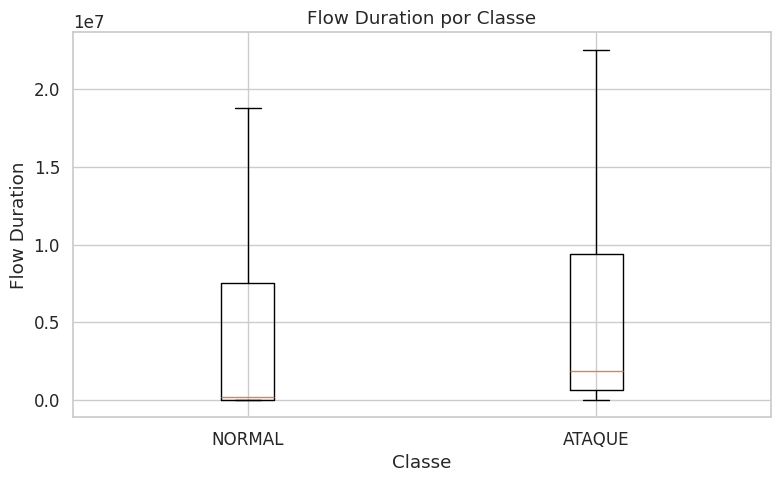

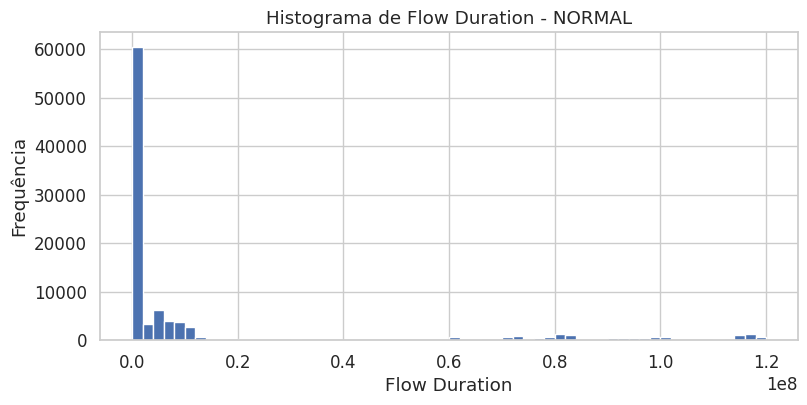


--- Visualização de `Total Length of Fwd Packets` vs `Target` ---


/tmp/ipython-input-969945292.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grupos, labels=labels, showfliers=False)


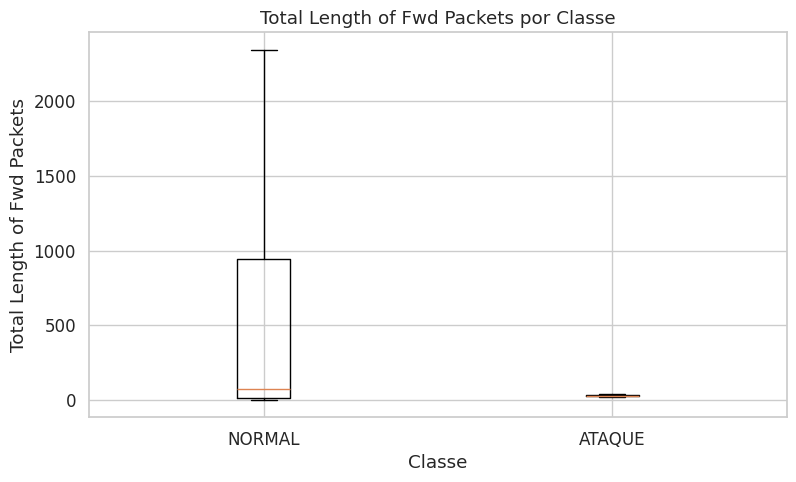

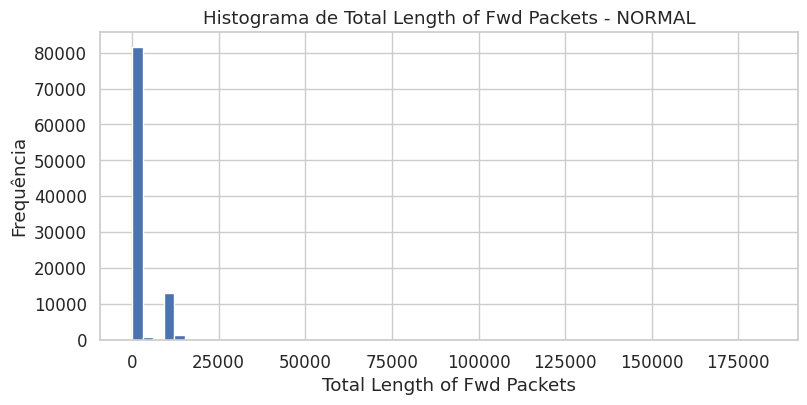


--- Visualização de `Average Packet Size` vs `Target` ---


/tmp/ipython-input-969945292.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(grupos, labels=labels, showfliers=False)


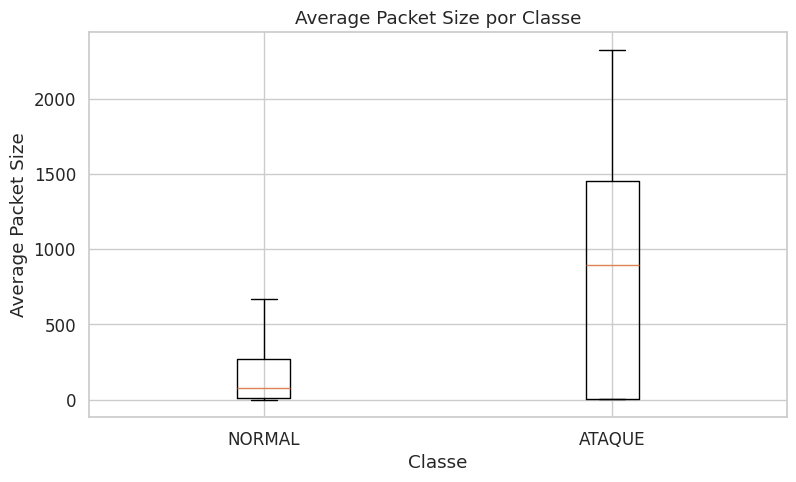

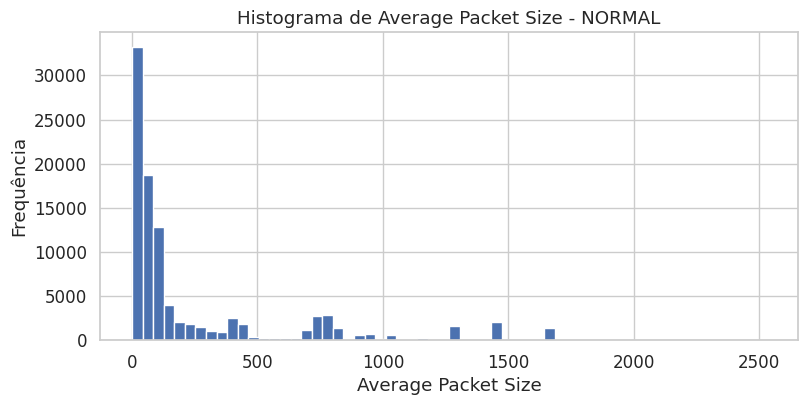

In [10]:
print("\n--- Visualização de `Flow Duration` vs `Target` ---")
boxplot_por_classe(df_clean_2, 'Flow Duration')
hist_por_classe(df_clean_2, 'Flow Duration', bins=60)

print("\n--- Visualização de `Total Length of Fwd Packets` vs `Target` ---")
boxplot_por_classe(df_clean_2, 'Total Length of Fwd Packets')
hist_por_classe(df_clean_2, 'Total Length of Fwd Packets', bins=60)

print("\n--- Visualização de `Average Packet Size` vs `Target` ---")
boxplot_por_classe(df_clean_2, 'Average Packet Size')
hist_por_classe(df_clean_2, 'Average Packet Size', bins=60)

**Comparativo de detecção com ITOps**

Objetivo desta Etapa: demonstrar a limitação de um sistema de monitoramento baseado em regras estáticas (ITOps) comparado a soluções AIOps, usando regras com lógicas AND e OR.

1) Importações e carregamento de dados
As bibliotecas necessárias já foram importadas na Etapa 2. O dataframe original (df) já está carregado e pronto para uso.

2) Pré-processamento e estatísticas descritivas
Aqui, o pré-processamento original da Etapa 3 foi adaptado para usar o df que já está em memória. As estatísticas descritivas das features Flow Duration, Total Length of Fwd Packets e RST Flag Count são impressas para guiar a criação das regras ITOps.

In [11]:
print("--- Análise Estatística da Etapa 3 ---")
# Garante nomes limpos nas colunas
df.columns = df.columns.str.strip()
# Seleciona as 3 features usadas nas regras ITOps
df_selected_cols = df[['Flow Duration', 'Total Length of Fwd Packets', 'RST Flag Count']]

# Estatísticas descritivas resumidas
print(df_selected_cols.describe())
# Correlações lineares entre as features (ajuda a ver dependências)
print("\nCorrelação das features:")
print(df_selected_cols.corr())

--- Análise Estatística da Etapa 3 ---
       Flow Duration  Total Length of Fwd Packets  RST Flag Count
count   2.257450e+05                225745.000000   225745.000000
mean    1.624165e+07                   939.463346        0.000120
std     3.152437e+07                  3249.403484        0.010936
min    -1.000000e+00                     0.000000        0.000000
25%     7.118000e+04                    26.000000        0.000000
50%     1.452333e+06                    30.000000        0.000000
75%     8.805237e+06                    63.000000        0.000000
max     1.199999e+08                183012.000000        1.000000

Correlação das features:
                             Flow Duration  Total Length of Fwd Packets  \
Flow Duration                     1.000000                     0.297832   
Total Length of Fwd Packets       0.297832                     1.000000   
RST Flag Count                    0.002768                     0.006207   

                             RST Flag Co

3) Detecção de Outliers e definição de limiares

Os limiares para as regras ITOps são definidos com base no percentil 95 das variáveis, uma abordagem que visa capturar os valores mais extremos do tráfego.


--- Definição de Limiares para Detecção de Outliers ---
Limiares definidos:
 Flow Duration > 93204499.8
 Total Length of Fwd Packets > 11607.0
 RST Flag Count > 0.0


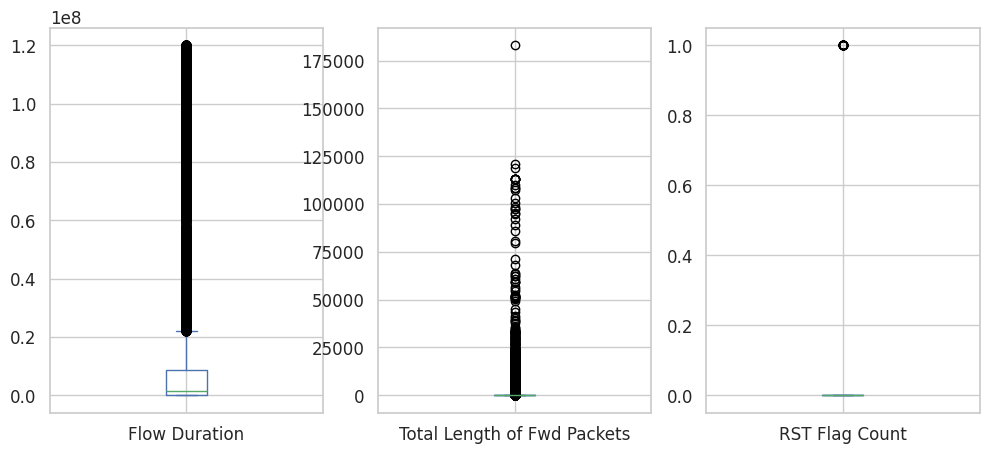

In [12]:
print("\n--- Definição de Limiares para Detecção de Outliers ---")
# calcula os limiares com base no percentil 95
flow_duration_thresh = df['Flow Duration'].quantile(0.95)
fwd_length_thresh = df['Total Length of Fwd Packets'].quantile(0.95)
rst_flags_thresh = df['RST Flag Count'].quantile(0.95)

# exibe os limiares
print("Limiares definidos:")
print(f" Flow Duration > {flow_duration_thresh}")
print(f" Total Length of Fwd Packets > {fwd_length_thresh}")
print(f" RST Flag Count > {rst_flags_thresh}")

# plota boxplots para inspecionar distribuições e outliers
df_selected_cols.plot(kind='box', subplots=True, layout=(1,3), figsize=(12, 5))
plt.show()

4) Criar e aplicar regras ITOps (lógica AND)

Uma função é criada para classificar fluxos com a lógica AND: um fluxo só é considerado um "Alerta" se todas as três condições de outlier forem atendidas. O resultado é visualizado em um gráfico.


--- Aplicação e Visualização da Regra ITOps com Lógica AND ---
Total de alertas (AND): 0
Total de fluxos normais (AND): 225745


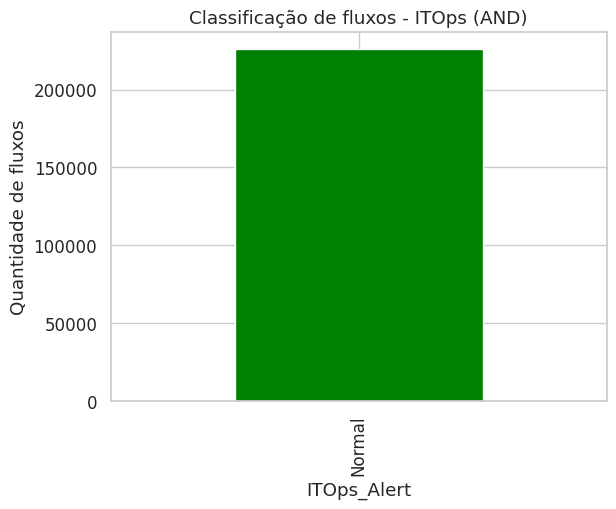

In [13]:
# Aplica a regra ITOps com lógica AND: alerta apenas se todas as 3 condições forem verdadeiras
print("\n--- Aplicação e Visualização da Regra ITOps com Lógica AND ---")
def itops_rule(flow):
    # Retorna "Alerta" se todas as features excederem seus limiares, caso contrário "Normal"
    if (flow['Flow Duration'] > flow_duration_thresh) and \
       (flow['Total Length of Fwd Packets'] > fwd_length_thresh) and \
       (flow['RST Flag Count'] > rst_flags_thresh):
        return "Alerta"
    else:
        return "Normal"

df['ITOps_Alert'] = df.apply(itops_rule, axis=1)

# Conta quantos fluxos foram marcados como Alerta/Normal
alert_count = df[df['ITOps_Alert'] == 'Alerta'].shape[0]
normal_count = df[df['ITOps_Alert'] == 'Normal'].shape[0]

print(f"Total de alertas (AND): {alert_count}")
print(f"Total de fluxos normais (AND): {normal_count}")

# Plota a distribuição das classificações
df['ITOps_Alert'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Classificação de fluxos - ITOps (AND)")
plt.ylabel("Quantidade de fluxos")
plt.show()

5) Criar e aplicar regras ITOps (lógica OR)

Uma segunda função é criada para a lógica OR. Desta vez, um fluxo é classificado como "Alerta" se pelo menos uma das condições de outlier for verdadeira. O resultado é visualizado em um segundo gráfico.


--- Aplicação e Visualização da Regra ITOps com Lógica OR ---
Total de alertas (OR): 15502
Total de fluxos normais (OR): 210243


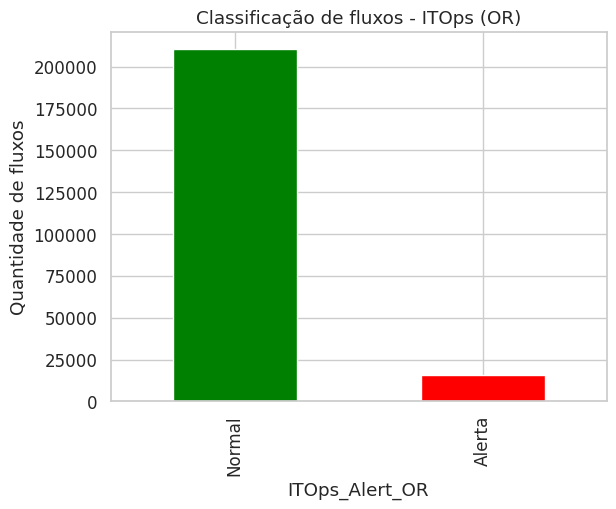

In [14]:
print("\n--- Aplicação e Visualização da Regra ITOps com Lógica OR ---")
# Regra OR: marca como "Alerta" se qualquer uma das 3 condições ultrapassar o limiar
def itops_rule_or(flow):
    if (flow['Flow Duration'] > flow_duration_thresh) or \
       (flow['Total Length of Fwd Packets'] > fwd_length_thresh) or \
       (flow['RST Flag Count'] > rst_flags_thresh):
        return "Alerta"
    else:
        return "Normal"

df['ITOps_Alert_OR'] = df.apply(itops_rule_or, axis=1)

# Contagem rápida de alertas e normais
alert_count_or = df[df['ITOps_Alert_OR'] == 'Alerta'].shape[0]
normal_count_or = df[df['ITOps_Alert_OR'] == 'Normal'].shape[0]

print(f"Total de alertas (OR): {alert_count_or}")
print(f"Total de fluxos normais (OR): {normal_count_or}")

# Visualiza distribuição de classificações (OR)
df['ITOps_Alert_OR'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title("Classificação de fluxos - ITOps (OR)")
plt.ylabel("Quantidade de fluxos")
plt.show()

6) Comparativo final entre AND e OR

O código final da Etapa 3 compara os resultados das duas abordagens, incluindo a correspondência de cada classificação com os rótulos originais (Label) do dataset, provando a maior sensibilidade da regra OR.


--- Comparativo entre regras ITOps (AND vs OR) ---
Total de fluxos: 225745
Regra AND - Alertas: 0 (0.00%)
Regra OR - Alertas: 15502 (6.87%)

Análise de correspondência com a coluna 'Label':
Regra AND vs Label:
ITOps_Alert  Label 
Normal       BENIGN     97718
             DDoS      128027
dtype: int64

Regra OR vs Label:
ITOps_Alert_OR  Label 
Alerta          BENIGN     10281
                DDoS        5221
Normal          BENIGN     87437
                DDoS      122806
dtype: int64


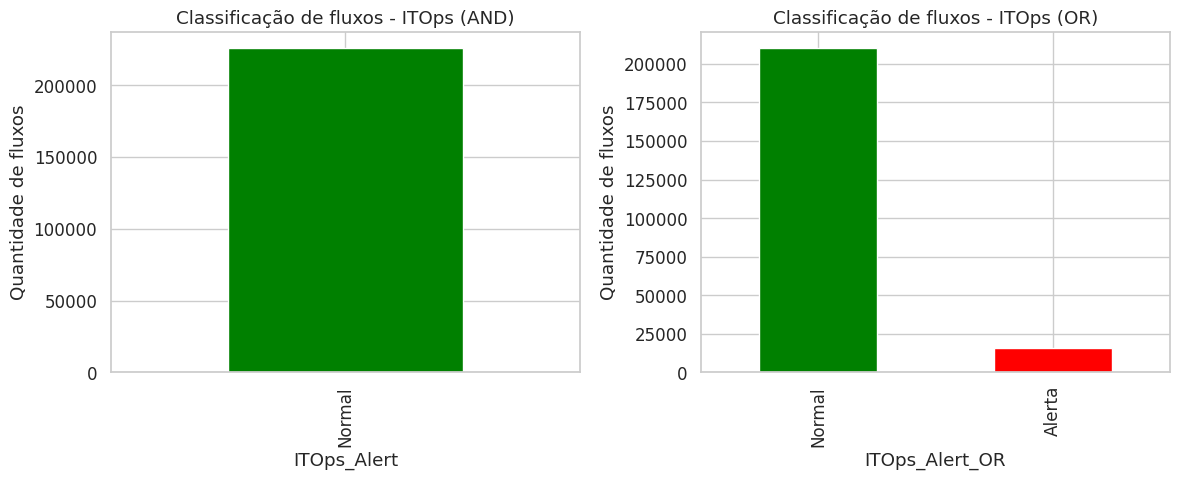

In [15]:
# Mostra porcentagem de alertas gerados por cada regra (AND vs OR)
print("\n--- Comparativo entre regras ITOps (AND vs OR) ---")
total_flows = df.shape[0]
print(f"Total de fluxos: {total_flows}")
print(f"Regra AND - Alertas: {alert_count} ({(alert_count/total_flows)*100:.2f}%)")
print(f"Regra OR - Alertas: {alert_count_or} ({(alert_count_or/total_flows)*100:.2f}%)")

# Verifica como os alertas se distribuem em relação aos rótulos reais (Label)
print("\nAnálise de correspondência com a coluna 'Label':")
print("Regra AND vs Label:")
print(df.groupby(['ITOps_Alert', 'Label']).size())

print("\nRegra OR vs Label:")
print(df.groupby(['ITOps_Alert_OR', 'Label']).size())

# Compara visualmente as contagens de alertas para as duas regras
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['ITOps_Alert'].value_counts().plot(kind='bar', color=['green', 'red'], ax=ax[0])
ax[0].set_title("Classificação de fluxos - ITOps (AND)")
ax[0].set_ylabel("Quantidade de fluxos")
df['ITOps_Alert_OR'].value_counts().plot(kind='bar', color=['green', 'red'], ax=ax[1])
ax[1].set_title("Classificação de fluxos - ITOps (OR)")
ax[1].set_ylabel("Quantidade de fluxos")
plt.tight_layout()
plt.show()

**Solução AIOps**

Objetivo desta Etapa: demonstrar a superioridade da detecção de ataques usando modelos de Machine Learning (AIOps) em comparação com o ITOps, treinando e avaliando RandomForest, XGBoost e LightGBM para classificar tráfego de rede como NORMAL ou ATAQUE (DDoS).

1) Imports e Pré-processamento para AIOps

As bibliotecas específicas para Machine Learning são importadas. O pré-processamento é refeito para a análise de ML, garantindo que o dataset esteja em um formato adequado para o treinamento, com a seleção de colunas numéricas e o mapeamento dos rótulos para 0 e 1.

In [16]:
# --- Preparação para os Modelos AIOps ---
# Observação: algumas dessas importações já foram feitas em células anteriores.
# Mantêm-se aqui por clareza/localidade, mas não são estritamente necessárias se já importadas.

import seaborn as sns  # estilo/tema para visualizações
from sklearn.model_selection import train_test_split  # divisão treino/teste
from sklearn.metrics import (  # métricas de avaliação usadas posteriormente
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)
from sklearn.ensemble import RandomForestClassifier  # modelo ML
from sklearn.tree import plot_tree  # visualização de árvore
from xgboost import XGBClassifier  # modelo XGBoost
from lightgbm import LGBMClassifier  # modelo LightGBM

# Configura o estilo padrão dos gráficos
sns.set(style="whitegrid", font_scale=1.1)

# Usa o dataframe 'df' que já foi carregado em células anteriores.
# Substitui infinitos por NaN e remove linhas com valores ausentes para evitar problemas no treino.
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(inplace=True)

# Remove espaços em branco nos nomes das colunas (boa prática para evitar KeyError)
df.columns = df.columns.str.strip()

# Padroniza rótulos da coluna 'Label' para dois estados: NORMAL e ATAQUE
df.loc[df['Label'] == "BENIGN", 'Label'] = "NORMAL"
df.loc[df['Label'] == "DDoS", 'Label'] = "ATAQUE"
valid_labels = {"NORMAL", "ATAQUE"}
# Filtra apenas as linhas com rótulos válidos
df = df[df['Label'].isin(valid_labels)].copy()

# Seleciona apenas as colunas numéricas para treinar os modelos
X = df.select_dtypes(include=[np.number]).copy()

# Mapeamento entre rótulos texto <-> numérico (0 = NORMAL, 1 = ATAQUE)
y_map = {"NORMAL": 0, "ATAQUE": 1}
y_inv = {0: "NORMAL", 1: "ATAQUE"}  # mapeamento inverso usado para relatórios
y = df['Label'].map(y_map)

# Divide em treino/teste mantendo a mesma proporção de classes (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=255, stratify=y
)

# Mostra tamanhos dos conjuntos para conferência
print(f"Shape do dataset total: {X.shape}")
print(f"Shape do dataset de treino: {X_train.shape}")
print(f"Shape do dataset de teste: {X_test.shape}")

Shape do dataset total: (225711, 78)
Shape do dataset de treino: (180568, 78)
Shape do dataset de teste: (45143, 78)


2) Definição de modelos e hiperparâmetros

Os hiperparâmetros para RandomForest, XGBoost e LightGBM são definidos para um bom custo-benefício em termos de desempenho e tempo de treinamento, conforme o original.

In [17]:
# Cabeçalho informativo sobre os hiperparâmetros que serão exibidos
print("\n--- Hiperparâmetros dos Modelos ---")

# Hiperparâmetros para RandomForestClassifier
# - n_estimators: número de árvores na floresta
# - max_depth: profundidade máxima de cada árvore (None => sem limite)
# - min_samples_split / min_samples_leaf: critérios de divisão e mínimo de amostras por folha
# - n_jobs: -1 usa todos os núcleos disponíveis
# - random_state: semente para reprodutibilidade
rf_params = dict(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=255
)

# Hiperparâmetros para XGBoost (XGBClassifier)
# - n_estimators: número de árvores (boosting rounds)
# - max_depth: profundidade máxima das árvores
# - learning_rate: taxa de aprendizado (shrinkage)
# - subsample / colsample_bytree: amostragem de linhas/colunas para reduzir overfitting
# - reg_lambda: regularização L2
# - tree_method="hist": método mais rápido para grandes datasets
# - eval_metric="logloss": métrica utilizada internamente durante treino/validação
# - n_jobs / random_state: paralelismo e reprodutibilidade
xgb_params = dict(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.10,
    subsample=0.80,
    colsample_bytree=0.80,
    reg_lambda=1.0,
    tree_method="hist",
    eval_metric="logloss",
    random_state=255,
    n_jobs=-1
)

# Hiperparâmetros para LightGBM (LGBMClassifier)
# - n_estimators: número de árvores
# - num_leaves: controla a complexidade da árvore (maior => mais complexidade)
# - learning_rate: taxa de aprendizado
# - subsample / colsample_bytree: amostragem para prevenir overfitting
# - reg_lambda: regularização L2
# - n_jobs / random_state: paralelismo e reprodutibilidade
lgb_params = dict(
    n_estimators=400,
    num_leaves=31,
    learning_rate=0.05,
    subsample=0.80,
    colsample_bytree=0.80,
    reg_lambda=0.0,
    random_state=255,
    n_jobs=-1
)

# Instancia os modelos com os parâmetros definidos acima
# As chaves do dicionário serão usadas como nomes/exibições nos relatórios posteriores
models = {
    "RandomForest": RandomForestClassifier(**rf_params),
    "XGBoost":      XGBClassifier(**xgb_params),
    "LightGBM":     LGBMClassifier(**lgb_params)
}

# Exibe os dicionários de hiperparâmetros para conferência no notebook
print("[RandomForest]", rf_params)
print("[XGBoost]",      xgb_params)
print("[LightGBM]",     lgb_params)


--- Hiperparâmetros dos Modelos ---
[RandomForest] {'n_estimators': 200, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'n_jobs': -1, 'random_state': 255}
[XGBoost] {'n_estimators': 300, 'max_depth': 6, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_lambda': 1.0, 'tree_method': 'hist', 'eval_metric': 'logloss', 'random_state': 255, 'n_jobs': -1}
[LightGBM] {'n_estimators': 400, 'num_leaves': 31, 'learning_rate': 0.05, 'subsample': 0.8, 'colsample_bytree': 0.8, 'reg_lambda': 0.0, 'random_state': 255, 'n_jobs': -1}


3) Treinamento e avaliação dos modelos

Os três modelos são treinados e avaliados, com as métricas de acurácia, precisão, recall e F1-score calculadas. As matrizes de confusão e os relatórios de classificação são salvos para posterior análise.

In [18]:
# Treinamento e avaliação dos modelos definidos no dicionário `models`
print("\n--- Treinamento e Avaliação dos Modelos AIOps ---")

# Listas/dicionários para armazenar resultados, matrizes de confusão, relatórios e modelos ajustados
resultados = []
conf_mats = {}
reports = {}
fitted_models = {}

# Itera sobre cada par (nome, modelo) e realiza fit / predição / cálculo de métricas
for nome, modelo in models.items():
    # Ajusta (treina) o modelo com os conjuntos X_train e y_train
    modelo.fit(X_train, y_train)
    # Armazena o modelo treinado para uso posterior (ex.: plot de árvore, inspeção)
    fitted_models[nome] = modelo

    # Prediz rótulos para o conjunto de teste
    y_pred = modelo.predict(X_test)

    # Calcula métricas padrão de classificação binária
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    rec = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    # Salva as métricas em formato tabular (lista de dicionários)
    resultados.append({
        "Modelo": nome,
        "Acurácia": acc,
        "Precisão": prec,
        "Recall": rec,
        "F1-Score": f1
    })

    # Para gerar matriz de confusão e classification_report usamos rótulos textuais
    # y_inv foi definido anteriormente para mapear 0->"NORMAL", 1->"ATAQUE"
    y_test_lbl = pd.Series(y_test).map(y_inv)   # converte y_test numérico para texto
    y_pred_lbl = pd.Series(y_pred).map(y_inv)   # converte y_pred numérico para texto

    # Gera matriz de confusão com ordem fixa de rótulos ["NORMAL", "ATAQUE"]
    cm = confusion_matrix(y_test_lbl, y_pred_lbl, labels=["NORMAL", "ATAQUE"])
    conf_mats[nome] = cm

    # Armazena o relatório de classificação em formato legível
    reports[nome] = classification_report(
        y_test_lbl, y_pred_lbl, target_names=["NORMAL", "ATAQUE"]
    )

# Ao final, imprime os classification reports de cada modelo para inspeção
for nome in models.keys():
    print(f"\n=== Classification Report: {nome} ===")
    print(reports[nome])


--- Treinamento e Avaliação dos Modelos AIOps ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 102420, number of negative: 78148
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.172204 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 14140
[LightGBM] [Info] Number of data points in the train set: 180568, number of used features: 68
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.567210 -> initscore=0.270478
[LightGBM] [Info] Start training from score 0.270478
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

4) Matrizes de confusão e comparativo de acurácia

As matrizes de confusão são plotadas para cada modelo, e um gráfico de barras é gerado para comparar a acurácia, demonstrando o desempenho superior dos modelos de ML.


--- Visualização das Matrizes de Confusão ---


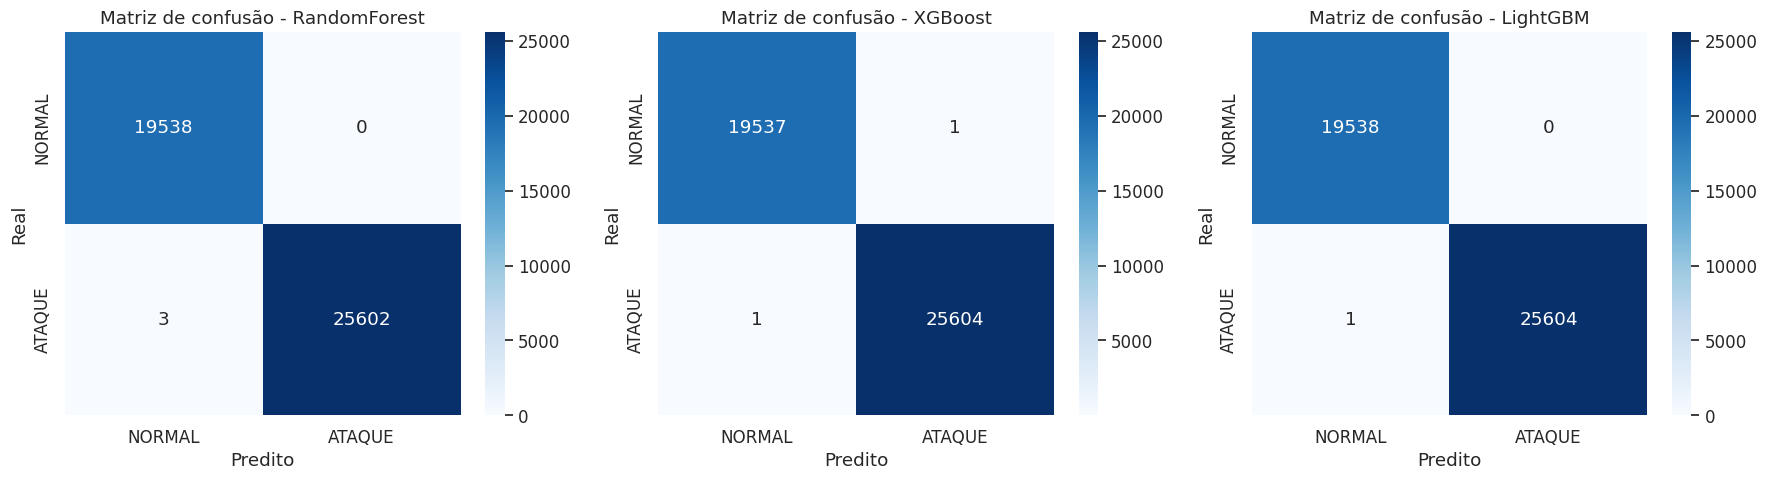


--- Comparativo de Acurácia ---
=== Comparativo de Métricas ===
         Modelo  Acurácia  Precisão    Recall  F1-Score
2      LightGBM  0.999978  1.000000  0.999961  0.999980
1       XGBoost  0.999956  0.999961  0.999961  0.999961
0  RandomForest  0.999934  1.000000  0.999883  0.999941


/tmp/ipython-input-854964176.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_res, x="Modelo", y="Acurácia", palette="viridis")


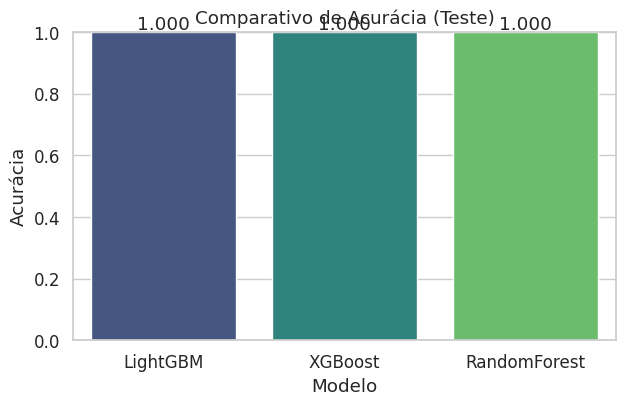

In [19]:
# Exibe cabeçalho informativo
print("\n--- Visualização das Matrizes de Confusão ---")

# Cria uma figura com 1 linha e 3 colunas para plotar as 3 matrizes de confusão
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Itera simultaneamente sobre eixos e pares (nome, matriz de confusão)
# zip garante que cada ax receba a matriz correspondente
for ax, (nome, cm) in zip(axs, conf_mats.items()):
    # Plota a matriz de confusão como um heatmap com anotações inteiras
    sns.heatmap(
        cm,
        annot=True,       # mostra os números dentro das células
        fmt='d',          # formato inteiro
        cmap='Blues',     # paleta de cores
        xticklabels=["NORMAL", "ATAQUE"],  # rótulos do eixo x (predito)
        yticklabels=["NORMAL", "ATAQUE"],  # rótulos do eixo y (real)
        ax=ax
    )
    # Títulos e rótulos para cada subplot
    ax.set_title(f"Matriz de confusão - {nome}")
    ax.set_xlabel("Predito")
    ax.set_ylabel("Real")

# Ajusta layout para evitar sobreposição e exibe a figura
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# Comparativo de acurácia entre os modelos
# ---------------------------------------------------------------------
print("\n--- Comparativo de Acurácia ---")

# Converte a lista de resultados em DataFrame e ordena por Acurácia decrescente
df_res = pd.DataFrame(resultados).sort_values(by="Acurácia", ascending=False)

# Imprime tabela com as métricas para inspeção rápida
print("=== Comparativo de Métricas ===")
print(df_res)

# Plota um gráfico de barras comparando a acurácia dos modelos
plt.figure(figsize=(7,4))
sns.barplot(data=df_res, x="Modelo", y="Acurácia", palette="viridis")
plt.ylim(0, 1.0)  # força limite entre 0 e 1 para facilitar leitura
plt.title("Comparativo de Acurácia (Teste)")

# Adiciona rótulos numéricos acima de cada barra com a acurácia formatada
for i, row in df_res.reset_index(drop=True).iterrows():
    val = float(row["Acurácia"]) if not pd.isna(row["Acurácia"]) else 0.0
    # posiciona o texto um pouco acima da barra, mas sem ultrapassar o topo do gráfico
    plt.text(i, min(val+0.01, 1.02), f"{val:.3f}", ha='center')

# Mostra o gráfico final
plt.show()

5) Visualização de uma árvore e melhor modelo

O código final exibe uma árvore de decisão de um dos modelos (RandomForest) e identifica o modelo com a melhor acurácia, conforme solicitado.


--- Visualização de uma Árvore de Decisão ---


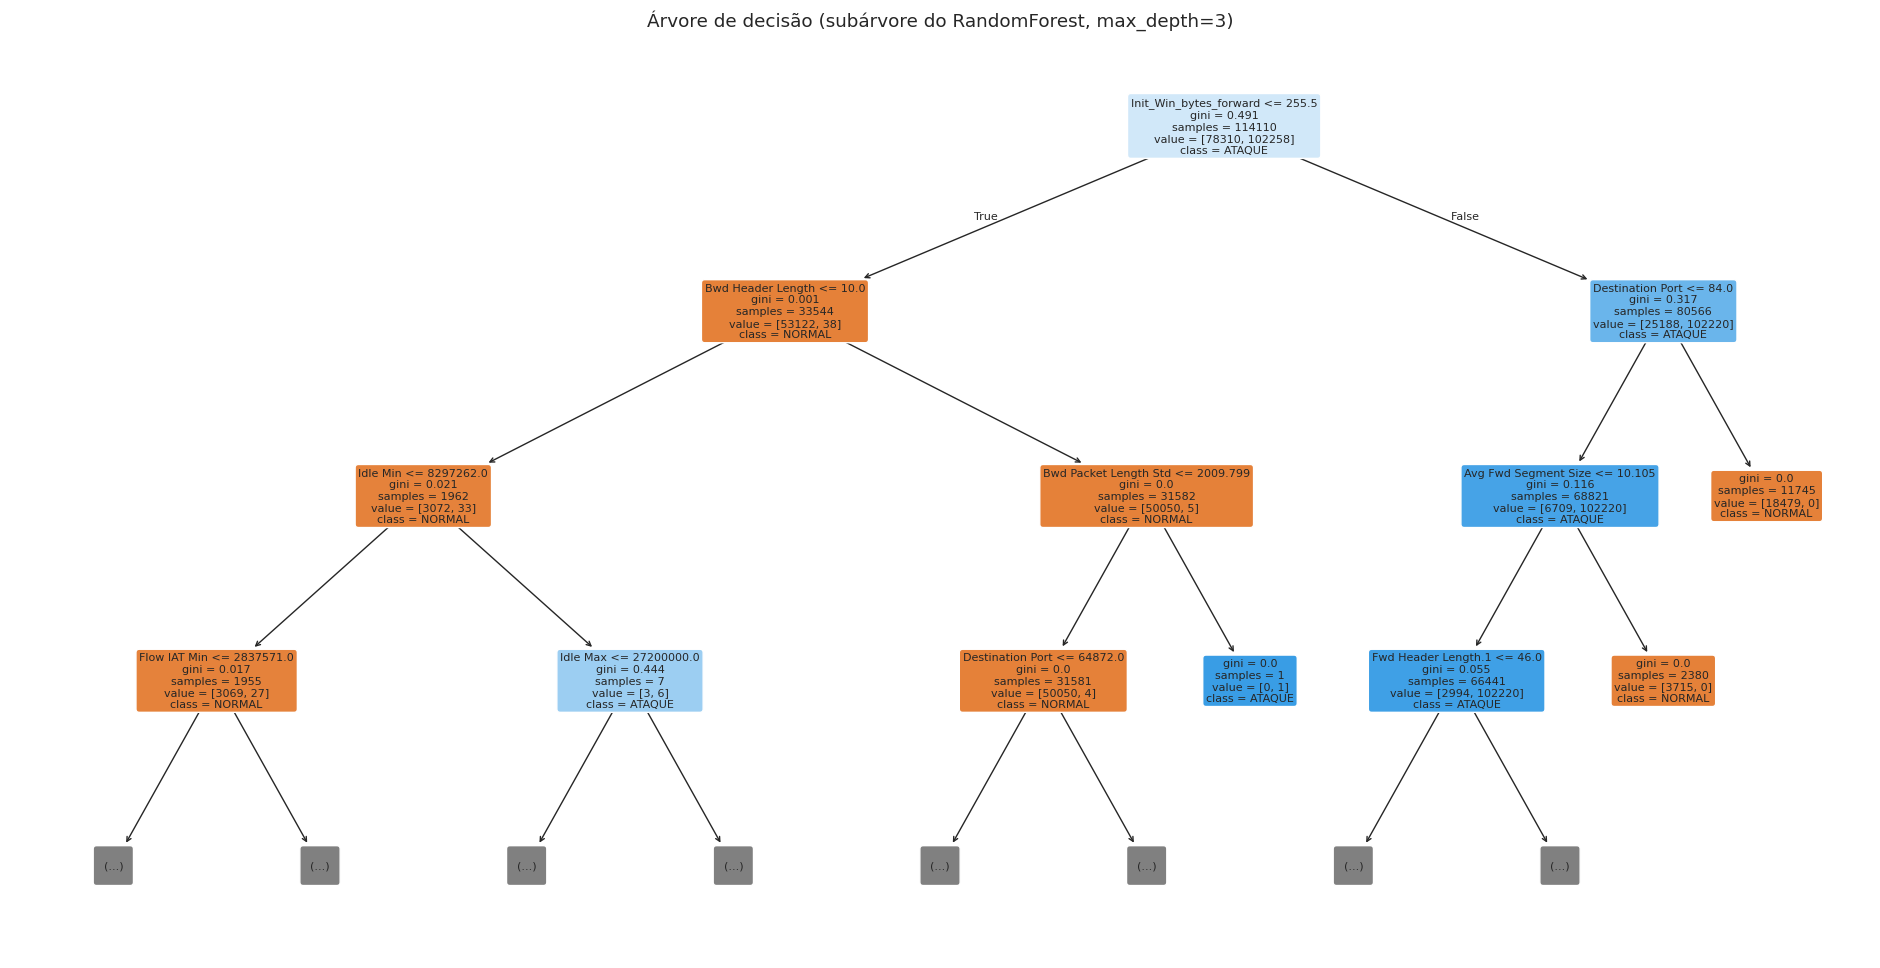


--- Melhor Modelo ---
=== Melhor modelo: LightGBM (Acurácia = 1.0000) ===


In [20]:
# Exibe uma subárvore do RandomForest para entender decisões (limita profundidade para legibilidade)
print("\n--- Visualização de uma Árvore de Decisão ---")
rf_model = fitted_models["RandomForest"]
one_tree = rf_model.estimators_[0]

plt.figure(figsize=(24, 12))
plot_tree(
    one_tree,
    feature_names=X.columns.tolist(),
    class_names=["NORMAL", "ATAQUE"],
    filled=True,
    max_depth=3,
    rounded=True,
    fontsize=8
)
plt.title("Árvore de decisão (subárvore do RandomForest, max_depth=3)")
plt.show()

# Identifica e imprime o modelo com maior acurácia no conjunto de testes
print("\n--- Melhor Modelo ---")
best_row = pd.DataFrame(resultados).sort_values(by="Acurácia", ascending=False).iloc[0]
best_model_name = best_row["Modelo"]
best_acc = float(best_row["Acurácia"]) if not pd.isna(best_row["Acurácia"]) else 0.0
print(f"=== Melhor modelo: {best_model_name} (Acurácia = {best_acc:.4f}) ===")